<a href="https://colab.research.google.com/github/sunneysood/deeplearning/blob/master/suny_sn1_gmail_com_Keras_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialization

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['train_' + string, 'val_'+string])
  plt.show()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [55]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [57]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [59]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model with 2 Hidden Layers with Dropout, batchOptimization




In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [62]:
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.25))

model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.55))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

In [63]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.9565 - acc: 0.7014 - val_loss: 0.3900 - val_acc: 0.8927
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.4957 - acc: 0.8503 - val_loss: 0.2957 - val_acc: 0.9146
Epoch 3/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.4066 - acc: 0.8772 - val_loss: 0.2525 - val_acc: 0.9282
Epoch 4/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.3571 - acc: 0.8927 - val_loss: 0.2252 - val_acc: 0.9340
Epoch 5/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.3252 - acc: 0.9028 - val_loss: 0.2062 - val_acc: 0.9382
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2990 - acc: 0.9103 - val_loss: 0.1909 - val_acc: 0.9427
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2807 - acc: 0.9154 - val_loss: 0.1788 - val_ac

Test score: 0.1151641580240801
Test accuracy: 0.9651


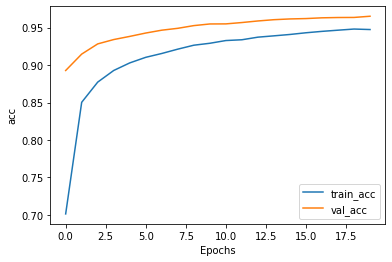

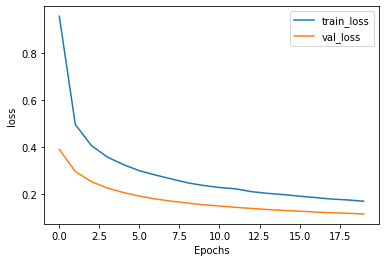

In [64]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

#vy = history.history['val_loss']
#ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

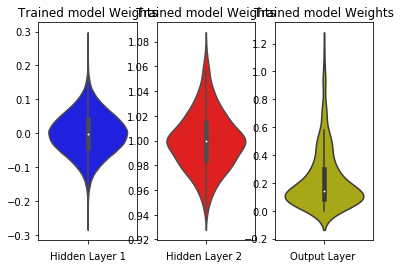

In [65]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model with 3 hidden Layers with Dropout, batchOptimization

In [66]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 64)                256       
_________________________________________________________________
dense_32 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dense_33 (Dense)             (None, 128)             

In [67]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 1.6647 - acc: 0.4491 - val_loss: 0.6307 - val_acc: 0.8530
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.8925 - acc: 0.7156 - val_loss: 0.4434 - val_acc: 0.8792
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.6989 - acc: 0.7831 - val_loss: 0.3632 - val_acc: 0.8967
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.6061 - acc: 0.8141 - val_loss: 0.3218 - val_acc: 0.9062
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.5457 - acc: 0.8371 - val_loss: 0.2849 - val_acc: 0.9173
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.5009 - acc: 0.8515 - val_loss: 0.2680 - val_acc: 0.9206
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.4678 - acc: 0.8619 - val_loss: 0.2481 - val_acc

Test score: 0.16338758776038886
Test accuracy: 0.9511


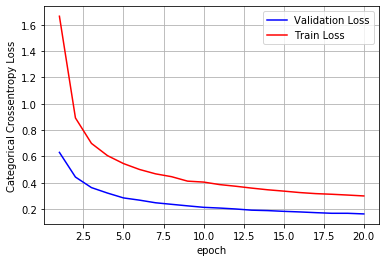

In [68]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

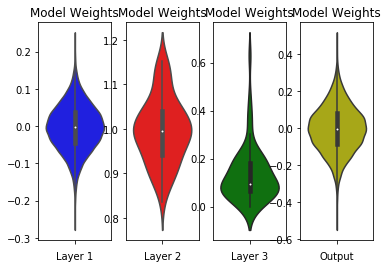

In [78]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 4, 2)
plt.title("Model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 4, 3)
plt.title("Model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Layer 3')

plt.subplot(1, 4, 4)
plt.title("Model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output')
plt.show()

# Model with 5 Hidden Layers with Dropout, batchOptimization

In [79]:
model_relu = Sequential()
model_relu.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dropout(0.25))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dropout(0.4))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
#model_relu.add(Dropout(0.5))
#model_relu.add(BatchNormalization())

model_relu.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 64)                256       
_________________________________________________________________
dense_40 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
_________________________________________________________________
dense_41 (Dense)             (None, 128)             

In [80]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 1.6535 - acc: 0.4569 - val_loss: 0.6691 - val_acc: 0.8258
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.9112 - acc: 0.7125 - val_loss: 0.4470 - val_acc: 0.8772
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.7125 - acc: 0.7817 - val_loss: 0.3670 - val_acc: 0.8964
Epoch 4/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.6044 - acc: 0.8182 - val_loss: 0.3140 - val_acc: 0.9079
Epoch 5/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.5422 - acc: 0.8404 - val_loss: 0.2821 - val_acc: 0.9176
Epoch 6/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.4918 - acc: 0.8558 - val_loss: 0.2610 - val_acc: 0.9230
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.4670 - acc: 0.8642 - val_loss: 0.2436 - val_acc

Test score: 0.1637038557458669
Test accuracy: 0.9511


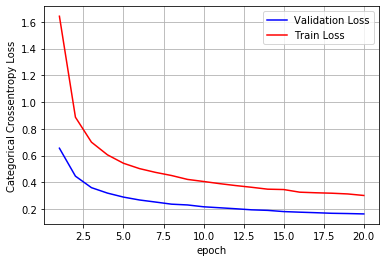

In [72]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

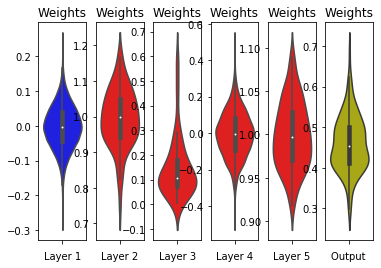

In [81]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Layer 2')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Layer 3')


plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Layer 4')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Layer 5')

plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output ')
plt.show()